In [ ]:
# 케라스를 이용한 mnist 분석
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#MNIST 데이터 읽어 들이기
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# 데이터 float32 자료형으로 변환하고 정규화하기
X_train=X_train.reshape(60000,784).astype('float32')
X_test=X_test.reshape(10000,784).astype('float')
X_train/=255   # 0과 1사이로 정규화
X_test/=255
X_train
# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기
y_train=np_utils.to_categorical(y_train,10)   # 10차원 배열 데이터로 변환
y_test=np_utils.to_categorical(y_test,10)
# ex) 5면 0,0,0,0,1,0,0,0,0 같이 표시

# 모델 구조 정의
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',    # 최적화 함수 지정
    optimizer=Adam(),
    metrics=['accuracy']
)

# 데이터 훈련
hist=model.fit(X_train,y_train)

# 테스트 데이터로 평가하기
score=model.evaluate(X_test,y_test,verbose=1)
print('loss=',score[0])
print('accuracy=',score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1268 - accuracy: 0.9600
loss= 0.12680070102214813
accuracy= 0.9599999785423279


5


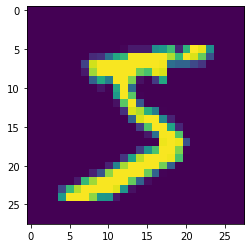

In [ ]:
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(y_train[0])
plt.imshow(x_train[0])

In [ ]:
# 비만도
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np

# BMI 데이터를 읽어 들이고 정규화 하기
csv=pd.read_csv('sample_data/bmi.csv')

# 몸무게와 키 데이터 정규화(0-1 사이 값)
csv['weight']/=100
csv['height']/=200
X=csv[['weight','height']].to_numpy() # numpy 형식으로 바꿔야  keras 수행 가능

# 레이블
# 문자를 숫자 데이터로 표현
bclass={'thin':[1,0,0],'normal':[0,1,0],'fat':[0,0,1]}
y=np.empty((20000,3))
for i,v in enumerate(csv['label']):
  y[i]=bclass[v]

# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
x_train,y_train=X[0:15000],y[0:15000]
x_test,y_test=X[15000:20000],y[15000:20000]

# 모델 구조 정의
model=Sequential()
model.add(Dense(512,input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
# 데이터 훈련
hist=model.fit(
    x_train,y_train,
    batch_size=100,   # 훈련시 지정 값으로 나누어 처리하여 효율 높임
    epochs=20,  # 반복횟수
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss',patience=2)],
    # patience -> accuracy값 하락이 지정 횟수만큼 반복되면 종료
    verbose=1)
    
# 테스트 데이터로 평가
score=model.evaluate(x_test,y_test)
print('loss=',score[0])
print('accuracy=',score[1])


Epoch 1/20
135/135 [==============================] - 4s 18ms/step - loss: 0.5152 - accuracy: 0.7973 - val_loss: 0.4939 - val_accuracy: 0.7353
Epoch 2/20
135/135 [==============================] - 3s 25ms/step - loss: 0.2536 - accuracy: 0.9004 - val_loss: 0.1581 - val_accuracy: 0.9727
Epoch 3/20
135/135 [==============================] - 3s 24ms/step - loss: 0.1901 - accuracy: 0.9210 - val_loss: 0.1503 - val_accuracy: 0.9300
Epoch 4/20
135/135 [==============================] - 3s 23ms/step - loss: 0.1567 - accuracy: 0.9366 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 5/20
135/135 [==============================] - 3s 24ms/step - loss: 0.1490 - accuracy: 0.9364 - val_loss: 0.0859 - val_accuracy: 0.9840
Epoch 6/20
135/135 [==============================] - 3s 22ms/step - loss: 0.1369 - accuracy: 0.9388 - val_loss: 0.0804 - val_accuracy: 0.9860
Epoch 7/20
135/135 [==============================] - 3s 20ms/step - loss: 0.1279 - accuracy: 0.9464 - val_loss: 0.0823 - val_accuracy: 0.9740